In [1]:
#conda install -c anaconda py-xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, roc_curve, roc_auc_score,auc, recall_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.feature_selection import mutual_info_classif

In [3]:
data=pd.read_csv("C:/Users/dell/Documents/datasets/bank loan data/credit_train.csv")

In [4]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,100000.000000,100000.00000
mean,1.176045e+07,870.271690,1.114281e+06,5.725220,18472.419450,18.274610,16.354410,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117500,0.02931
std,3.178394e+07,1392.588602,1.113342e+06,3.631136,12174.993149,7.019954,23.023402,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351105,0.25817
min,1.080200e+04,0.000000,0.000000e+00,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,1.796520e+05,671.000000,5.744650e+05,2.000000,10214.000000,14.000000,0.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.00000
50%,3.122460e+05,717.000000,1.018001e+06,6.000000,16220.000000,17.000000,0.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.00000
75%,5.249420e+05,738.000000,1.512704e+06,10.000000,24012.000000,22.000000,29.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.00000
max,1.000000e+08,7510.000000,1.655574e+08,10.000000,435843.000000,71.000000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.00000


In [5]:
data.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
 Years in current job           0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             2
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [6]:
data.shape

(100000, 19)

<h3> dealing with outliers

In [7]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709,1167493,8,Home Mortgage,Home Improvements,5215,17,0,6,1,228190,416746.0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,0,0,10,Home Mortgage,Debt Consolidation,33296,21,8,35,0,229976,850784.0,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8,Own Home,Debt Consolidation,29201,15,29,18,1,297996,750090.0,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721,806949,3,Own Home,Debt Consolidation,8742,12,0,9,0,256329,386958.0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,0,0,5,Rent,Debt Consolidation,20640,6,0,15,0,253460,427174.0,0,0


In [8]:
data['Purpose'].value_counts()

Debt Consolidation      78552
Other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
Major Purchase            352
Small Business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
Renewable Energy           10
Name: Purpose, dtype: int64

In [9]:
data.shape

(100000, 19)

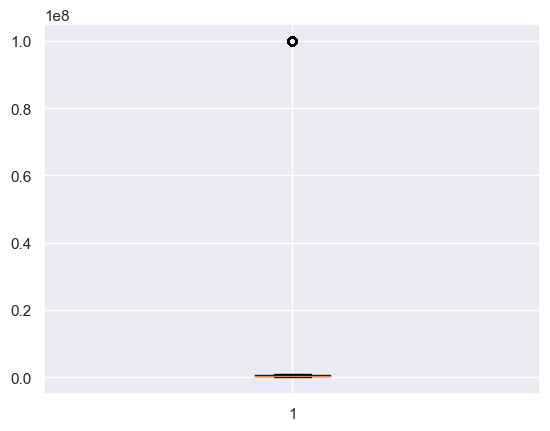

In [10]:
plt.boxplot(data['Current Loan Amount'])
plt.show()

In [11]:
#ind=data[data['Current Loan Amount'] > 10000000].index
#data.drop(ind, inplace=True)

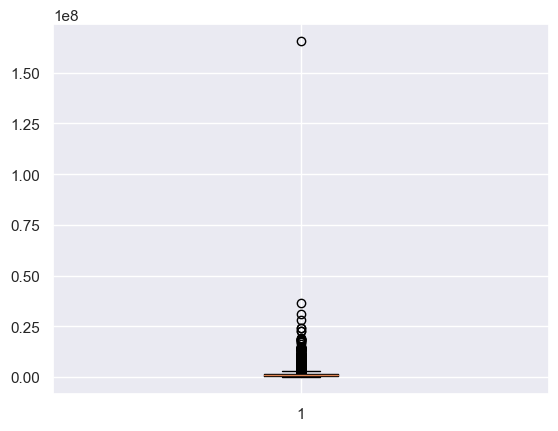

In [12]:
plt.boxplot(data['Annual Income'])
plt.show()

indd=data[data['Annual Income'] >2800000].index
data.drop(indd, inplace=True)

In [13]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', ' Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

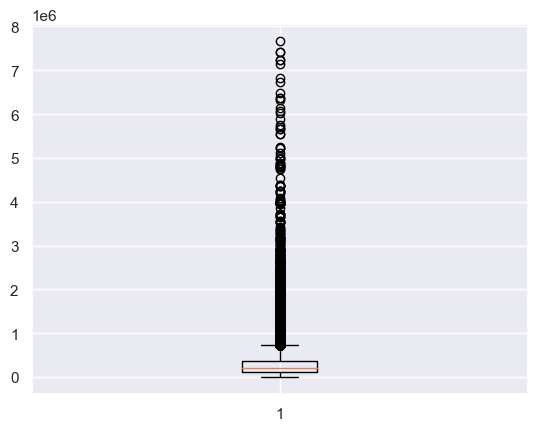

In [14]:
plt.boxplot(data['Current Credit Balance'])
plt.show()

index=data[data['Current Credit Balance']> 650000].index
data.drop(index, inplace=True)

In [15]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                      int64
Annual Income                     int64
 Years in current job             int64
Home Ownership                   object
Purpose                          object
Monthly Debt                      int64
Years of Credit History           int64
Months since last delinquent      int64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                      int64
Tax Liens                         int64
dtype: object

In [16]:
ler=LabelEncoder()
data['Term']=ler.fit_transform(data['Term'])
data['Purpose']=ler.fit_transform(data['Purpose'])
data['Years in current job']=data[' Years in current job']
data['Loan status']=data['Loan Status'].map({'Fully Paid':1, 'Charged Off': 0})
data['Home Ownership']=data['Home Ownership'].map({'Home Mortgage':0,'Rent':1, 'Own Home':2})
data['Maximum Open Credit']=data['Maximum Open Credit'].fillna(data['Maximum Open Credit'].mean())
data['Maximum Open Credit']=data['Maximum Open Credit'].astype('int64')

In [17]:
heat=data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_10864\1826352547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat=data.corr()


<Axes: >

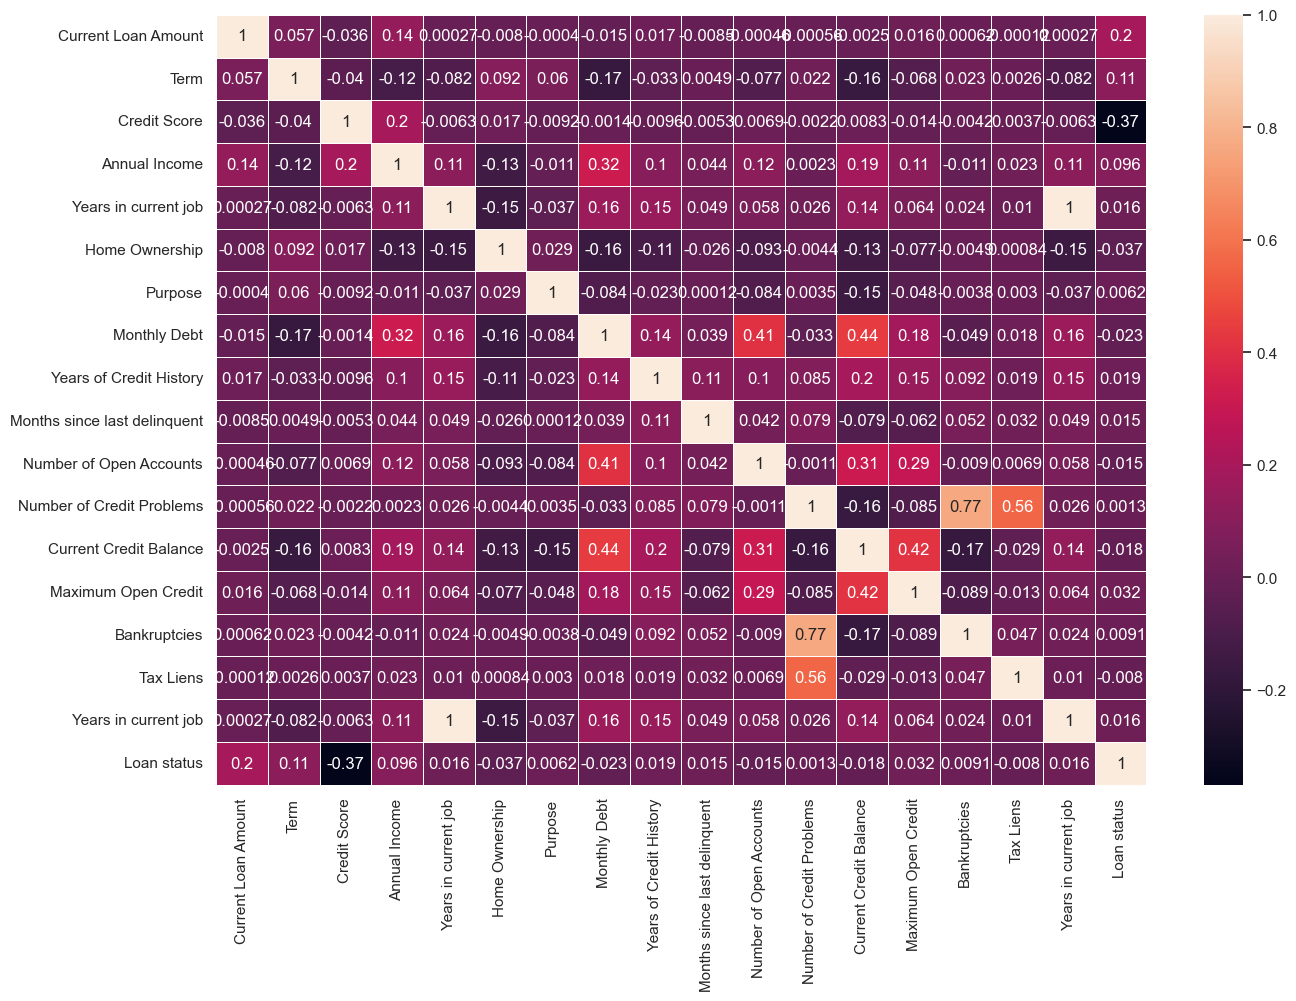

In [18]:
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(heat, annot=True, linewidth=.6, ax=ax)

In [19]:
data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_10864\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years in current job,Loan status
Current Loan Amount,1.000000,0.057189,-0.036489,0.142713,0.000272,-0.008037,-0.000395,-0.014662,0.016760,-0.008453,-0.000460,-0.000562,-0.002492,0.016090,0.000618,-0.000123,0.000272,0.195844
Term,0.057189,1.000000,-0.039969,-0.117128,-0.082490,0.092433,0.060096,-0.169072,-0.033280,0.004902,-0.076620,0.021803,-0.162216,-0.068369,0.023167,0.002599,-0.082490,0.112600
Credit Score,-0.036489,-0.039969,1.000000,0.196612,-0.006315,0.016715,-0.009174,-0.001384,-0.009606,-0.005319,0.006925,-0.002181,0.008271,-0.013563,-0.004234,0.003713,-0.006315,-0.368595
Annual Income,0.142713,-0.117128,0.196612,1.000000,0.114794,-0.133658,-0.010508,0.316857,0.100578,0.043567,0.117521,0.002250,0.187269,0.108022,-0.011153,0.022942,0.114794,0.095549
Years in current job,0.000272,-0.082490,-0.006315,0.114794,1.000000,-0.148165,-0.037074,0.162563,0.154539,0.048737,0.058467,0.026006,0.136938,0.063802,0.023896,0.010496,1.000000,0.015837
Home Ownership,-0.008037,0.092433,0.016715,-0.133658,-0.148165,1.000000,0.029092,-0.159104,-0.111913,-0.026100,-0.093397,-0.004428,-0.130404,-0.077388,-0.004917,0.000835,-0.148165,-0.037135
Purpose,-0.000395,0.060096,-0.009174,-0.010508,-0.037074,0.029092,1.000000,-0.083550,-0.023002,0.000121,-0.084161,0.003461,-0.147492,-0.048378,-0.003821,0.003047,-0.037074,0.006217
Monthly Debt,-0.014662,-0.169072,-0.001384,0.316857,0.162563,-0.159104,-0.083550,1.000000,0.140425,0.038969,0.406672,-0.033415,0.443907,0.184569,-0.049284,0.018464,0.162563,-0.022898
Years of Credit History,0.016760,-0.033280,-0.009606,0.100578,0.154539,-0.111913,-0.023002,0.140425,1.000000,0.106180,0.101593,0.084781,0.195395,0.153306,0.091529,0.018604,0.154539,0.019064
Months since last delinquent,-0.008453,0.004902,-0.005319,0.043567,0.048737,-0.026100,0.000121,0.038969,0.106180,1.000000,0.041787,0.078898,-0.078883,-0.061909,0.052459,0.032330,0.048737,0.014741


In [20]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', ' Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years in current job', 'Loan status'],
      dtype='object')

In [21]:
data=data.drop(columns=['Loan ID','Customer ID','Loan Status', ' Years in current job'])
data

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years in current job,Loan status
0,445412,1,709,1167493,0,5,5215,17,0,6,1,228190,416746,1,0,8,1
1,262328,1,0,0,0,3,33296,21,8,35,0,229976,850784,0,0,10,1
2,99999999,1,741,2231892,2,3,29201,15,29,18,1,297996,750090,0,0,8,1
3,347666,0,721,806949,2,3,8742,12,0,9,0,256329,386958,0,0,3,1
4,176220,1,0,0,1,3,20640,6,0,15,0,253460,427174,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070,1,725,475437,2,8,2203,22,0,5,0,47766,658548,0,0,7,1
99996,99999999,1,732,1289416,1,3,13109,9,21,22,0,153045,509234,0,0,1,1
99997,103136,1,742,1150545,1,3,7316,19,18,12,1,109554,537548,1,0,6,1
99998,530332,1,746,1717524,1,3,9890,15,0,8,0,404225,738254,0,0,9,1


In [22]:
data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years in current job', 'Loan status'],
      dtype='object')

In [23]:
b=data.drop(columns=['Loan status'],axis=0)
y=data['Loan status']
#X=data[['Current Loan Amount','Term','Credit Score','Annual Income','Years in current job','Home Ownership','Purpose','Monthly Debt','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Months since last delinquent']]

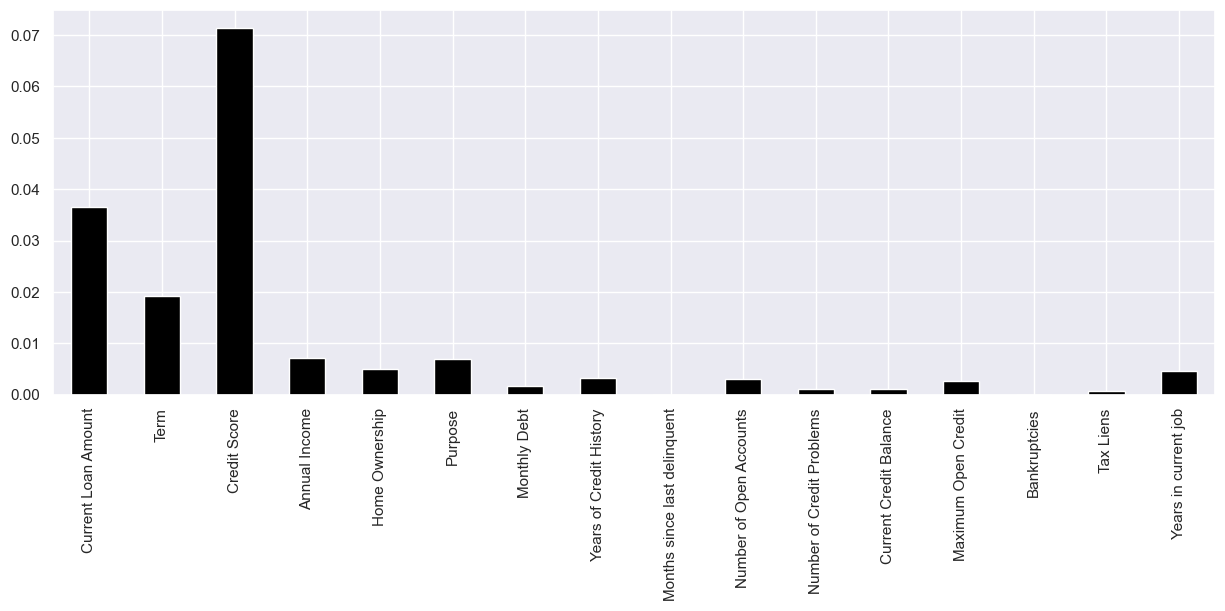

In [24]:
importances=mutual_info_classif(b,y)
feature_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
feature_importances.plot(kind='bar', color='black', figsize=(15,5))
plt.show()

In [25]:
#X=data[['Current Loan Amount','Term','Credit Score', 'Annual Income','Home Ownership','Purpose','Monthly Debt','Years of Credit History','Current Credit Balance','Maximum Open Credit','Years in current job']]
X=data[['Current Loan Amount','Term','Credit Score','Annual Income', 'Home Ownership','Purpose','Monthly Debt','Years of Credit History','Current Credit Balance','Years in current job']]
y=data['Loan status']

In [26]:
x_train, x_val, y_train,y_val=train_test_split(X, y, test_size=0.25, random_state=4, shuffle=True)

In [27]:
X.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Current Credit Balance', 'Years in current job'],
      dtype='object')

<h1> Logistic 

In [28]:
log=LogisticRegression()
log.fit(x_train, y_train)
log_pred=log.predict(x_val)

<h3> Performance Evaluation

<Axes: >

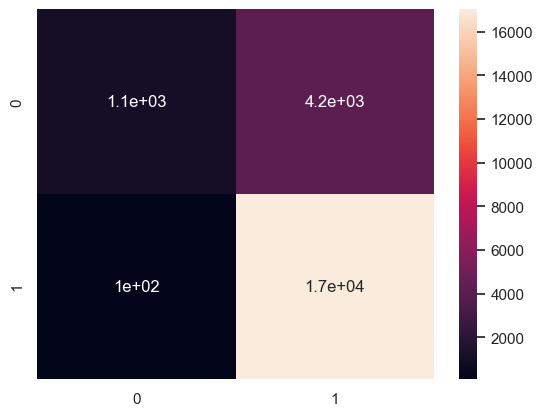

In [29]:
f1_logistic=f1_score(y_val, log_pred)

accuracy_logistic=accuracy_score(y_val, log_pred)

recall_logistic=recall_score(y_val, log_pred)

precision_logistic=precision_score(y_val, log_pred)

mae_logistic=mae(y_val, log_pred)

mse_logistic=mse(y_val, log_pred)
roc_logistic=roc_auc_score(y_val, log_pred)

confusion=confusion_matrix(y_val, log_pred)
sns.heatmap(confusion, annot=True)
fpr, tpr, thresholds = roc_curve(y_val, log_pred) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

print(roc_auc_score(y_val, log_pred))

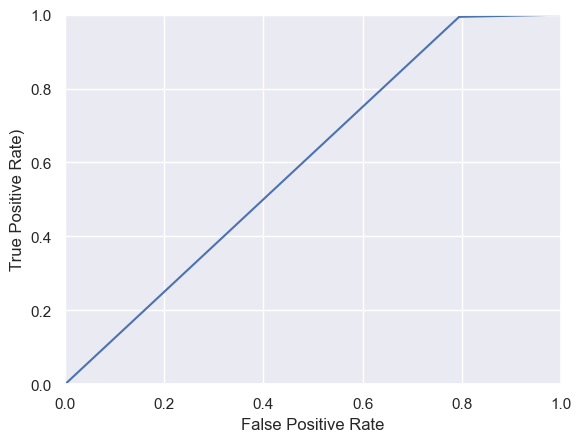

0.5997890733827381


In [30]:
fpr, tpr, thresholds = roc_curve(y_val, log_pred) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

print(roc_auc_score(y_val, log_pred))

<h3> Hyper tuning

In [32]:
values=[0.25]
accuracy_log=[]
mean_absolute_log=[]
precision_log=[]
mean_square_log=[]
recall_log=[]
f1_log=[]
roc_log=[]
for i in values:
    x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=i, shuffle=True, random_state=1234)
    from sklearn.linear_model import LogisticRegression
    logistic=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,penalty='l1', solver='liblinear')
    logistic.fit(x_train,y_train)
    yhat=logistic.predict(x_val)
    acc=accuracy_score(y_val, yhat)
    accuracy_log.append(acc)
    mean_=mae(y_val, yhat)
    mean_absolute_log.append(mean_)
    f1=f1_score(y_val, yhat)
    f1_log.append(f1)
    precision=precision_score(y_val, yhat)
    precision_log.append(precision)
    mean=mse(y_val, yhat)
    mean_square_log.append(mean)
    recall=recall_score(y_val, yhat)
    recall_log.append(recall)
    roc=roc_auc_score(y_val, yhat)
    roc_log.append(roc)
roc_log

[0.647551962546882]

<h1> Decision

In [34]:
# values=[i for i in range(1,21)]
# for i in values:
   # train_scores=[]
   # val_scores=[]
    #model=DecisionTreeClassifier(max_depth=i)
    #model.fit(x_train, y_train)
    #train_yhat=model.predict(x_train)
    #train_acc=accuracy_score(y_train, train_yhat)
    #train_scores.append(train_acc)
    #val_yhat=model.predict(x_val)
    #val_acc=accuracy_score(y_val, val_yhat)
    #val_scores.append(val_acc)
    #plt.plot(i, train_scores, '-o', label='train')
    #plt.plot(i, val_scores, '-o', label='test')

In [35]:
dec=DecisionTreeClassifier()
dec.fit(x_train, y_train)
dec_pred=dec.predict(x_val)
f1_decision= f1_score(y_val, dec_pred)

accuracy_decision=accuracy_score(y_val, dec_pred)

recall_decision=recall_score(y_val, dec_pred)

precision_decision=precision_score(y_val, dec_pred)

mae_decision=mae(y_val, dec_pred)

mse_decision=mse(y_val, dec_pred)

<h3> Hyperparameter tuning

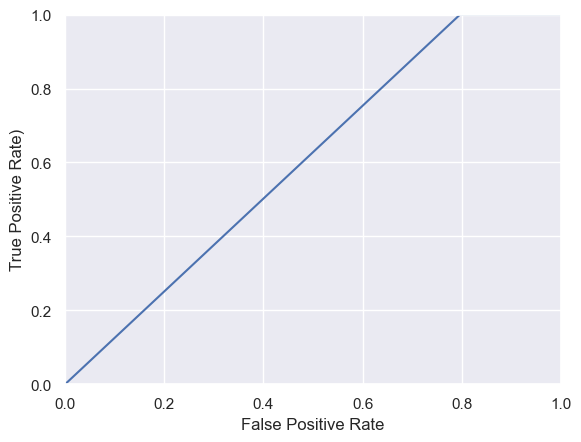

0.6019522776572668


In [75]:
values=[0.20]
accuracy_dec=[]
mean_absolute_dec=[]
precision_dec=[]
mean_square_dec=[]
recall_dec=[]
f1_dec=[]
roc_dec=[]
for i in values:
    x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=i, shuffle=True, random_state=1234)
    decision=DecisionTreeClassifier(max_depth=6, random_state=2, min_samples_leaf=2)
    decision.fit(x_train, y_train)
    yhat=decision.predict(x_val)
    acc=accuracy_score(y_val, yhat)
    accuracy_dec.append(acc)
    mean_=mae(y_val, yhat)
    mean_absolute_dec.append(mean_)
    f1=f1_score(y_val, yhat)
    f1_dec.append(f1)
    precision=precision_score(y_val, yhat)
    precision_dec.append(precision)
    mean=mse(y_val, yhat)
    mean_square_dec.append(mean)
    recall=recall_score(y_val, yhat)
    recall_dec.append(recall)
    roc=roc_auc_score(y_val, yhat)
    roc_dec.append(roc)
    fpr, tpr, thresholds = roc_curve(y_val, yhat) 
    plt.plot(fpr, tpr) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.0])    
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate)') 
    plt.show()

    print(roc_auc_score(y_val, yhat))

In [38]:
mean_square_dec

[0.1846076458752515]

<h1> XGBoost

In [39]:
import xgboost as xgb
xg=xgb.XGBClassifier(objective='binary:logistic',n_estimators=20000, seed=123)

In [40]:
#xg.fit(x_train,y_train)
#xg_pred=xg.predict(x_val)
#f1_xg= f1_score(y_val, xg_pred)

#accuracy_xg=accuracy_score(y_val, xg_pred)

#recall_xg=recall_score(y_val, xg_pred)

#precision_xg=precision_score(y_val, xg_pred)

#mae_xg=mae(y_val, xg_pred)

#mse_xg=mse(y_val, xg_pred)

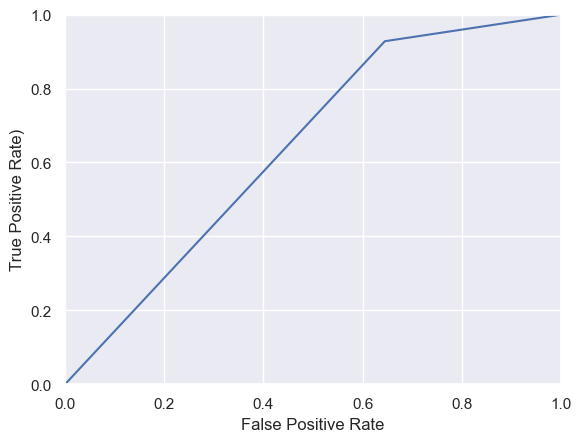

0.6416875923266319


In [41]:
values=[0.20]
accuracy_xg=[]
mean_absolute_xg=[]
precision_xg=[]
mean_square_xg=[]
recall_xg=[]
f1_xg=[]
roc_xg=[]
for i in values:
    x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=i, shuffle=True, random_state=1234)
    xg.fit(x_train,y_train)
    yhat=xg.predict(x_val)
    acc=accuracy_score(y_val, yhat)
    accuracy_xg.append(acc)
    mean_=mae(y_val, yhat)
    mean_absolute_xg.append(mean_)
    f1=f1_score(y_val, yhat)
    f1_xg.append(f1)
    precision=precision_score(y_val, yhat)
    precision_xg.append(precision)
    mean=mse(y_val, yhat)
    mean_square_xg.append(mean)
    recall=recall_score(y_val, yhat)
    recall_xg.append(recall)
    roc_auc=roc_auc_score(y_val, yhat)
    roc_xg.append(roc_auc)
    fpr, tpr, thresholds = roc_curve(y_val, yhat) 
    plt.plot(fpr, tpr) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.0])    
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate)') 
    plt.show()

    print(roc_auc_score(y_val, yhat))

<h1> Random Forest

In [42]:
random=RandomForestClassifier()
random.fit(x_train,y_train)
random_yhat=random.predict(x_val)
precision_ran=precision_score(y_val, random_yhat)
accuracy_ran=accuracy_score(y_val, random_yhat)
f1_ran=f1_score(y_val,random_yhat)
mse_ran=mse(y_val, yhat)
mae_ran=mae(y_val, yhat)
recall_ran=recall_score(y_val,yhat)
roc_ran=roc_auc_score(y_val, yhat)

In [ ]:
y=random.predict([[]])

<h3> hyperparameter tuning

In [45]:
values=[0.20]
accuracy_random=[]
mean_absolute_random=[]
mean_square_random=[]
precision_random=[]
recall_random=[]
f1_random=[]
roc_random=[]
for i in values:
    x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=i, shuffle=True, random_state=1234)
    from sklearn.ensemble import RandomForestClassifier
    random_forest=RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,criterion='log_loss',n_estimators=10, max_features='log2')
    random_forest.fit(x_train, y_train)
    from sklearn.metrics import accuracy_score, mean_absolute_error as mae
    yhat=random.predict(x_val)
    acc=accuracy_score(y_val, yhat)
    accuracy_random.append(acc)
    mean_=mae(y_val, yhat)
    mean_absolute_random.append(mean_)
    prec=precision_score(y_val, yhat)
    precision_random.append(prec)
    mean=mse(y_val, yhat)
    mean_square_random.append(mean)
    recall=recall_score(y_val, yhat)
    recall_random.append(recall)
    f1=f1_score(y_val, yhat)
    f1_random.append(f1)
    roc=roc_auc_score(y_val, yhat)
    roc_random.append(roc)
    
roc_random

[0.6195441954831511]

In [46]:
mean_absolute_random

[0.18717862731947238]

<h1> SVM

In [47]:
from sklearn import svm
svm_svc=svm.SVC()

In [48]:
param_grids = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_hyper=GridSearchCV(estimator=svm_svc, param_grid=param_grids, refit=True, verbose=5)

In [49]:
values=[0.20]
accuracy_svm=[]
mean_absolute_svm=[]
precision_svm=[]
mean_square_svm=[]
recall_svm=[]
f1_svm=[]
roc_svm=[]
for i in values:
    x_train, x_val, y_train, y_val=train_test_split(X,y, test_size=i, shuffle=True, random_state=1234)
    from sklearn import svm
    sv=svm.SVC()
    sv.fit(x_train, y_train)
    yhat=random.predict(x_val)
    acc=accuracy_score(y_val, yhat)
    accuracy_svm.append(acc)
    mean_=mae(y_val, yhat)
    mean_absolute_svm.append(mean_)
    f1=f1_score(y_val, yhat)
    f1_svm.append(f1)
    precision=precision_score(y_val, yhat)
    precision_svm.append(precision)
    mean=mse(y_val, yhat)
    mean_square_svm.append(mean)
    recall=recall_score(y_val, yhat)
    recall_svm.append(recall)
    roc=roc_auc_score(y_val, yhat)
    roc_svm.append(roc)

<h1> Proposed model (Combination of more models)

In [84]:


classifiers=[('XGBoost',xg),('Decision Tree',dec)]
vc=VotingClassifier(estimators=classifiers)
vc.fit(x_train, y_train)
yhat=vc.predict(x_val)
accuracy_vc=[]
accuracy_vc.append(accuracy_score(y_val, yhat))

mean_absolute_vc=[]
mean_absolute_vc.append(mae(y_val, yhat))

mean_square_vc=[]
mean_square_vc.append(mse(y_val, yhat))

recall_vc=[]
recall_vc.append(recall_score(y_val, yhat))

precision_vc=[]
precision_vc.append(precision_score(y_val, yhat))

roc_vc=[]
roc_vc.append(roc_auc_score(y_val, yhat))

f1_vc=[]
f1_vc.append(f1_score(yhat, y_val))

In [85]:
metrics={'Accuracy Score': [accuracy_logistic, accuracy_dec, accuracy_xg,accuracy_ran, accuracy_svm,accuracy_vc ],'Mean Absolute Error':[mae_logistic, mean_absolute_dec, mean_absolute_xg,mae_ran, mean_absolute_svm, mean_absolute_vc], 'Precision Score':[precision_logistic,precision_dec, precision_xg,precision_ran, precision_svm, precision_vc ], 'Recall Score':[recall_logistic, recall_dec, recall_xg, recall_ran, recall_svm, recall_vc],'F1 Score':[f1_logistic, f1_dec, f1_xg, f1_ran, f1_svm, f1_vc],'Mean Squared Error':[mse_logistic, mean_square_dec, mean_square_xg, mse_ran, mean_square_svm, mean_square_vc],'Roc_Auc_Score':[roc_logistic, roc_dec, roc_xg, roc_ran, roc_svm, roc_vc]}
metrics

{'Accuracy Score': [0.8093002459199642,
  [0.8153923541247485],
  [0.795271629778672],
  0.8128213726805276,
  [0.8128213726805276],
  [0.7379275653923542]],
 'Mean Absolute Error': [0.19069975408003578,
  [0.1846076458752515],
  [0.20472837022132798],
  0.20472837022132798,
  [0.18717862731947238],
  [0.2620724346076459]],
 'Precision Score': [0.8035023128481072,
  [0.8062302006335798],
  [0.8266364225534673],
  0.8141699915366944,
  [0.8141699915366944],
  [0.8521313005600498]],
 'Recall Score': [0.994043795620438,
  [1.0],
  [0.9281088554173034],
  0.9281088554173034,
  [0.9799898129957069],
  [0.7971330859346576]],
 'F1 Score': [0.8886742710970739,
  [0.8927214264834844],
  [0.8744386933123093],
  0.8894172032359254,
  [0.8894172032359254],
  [0.8237151772623031]],
 'Mean Squared Error': [0.19069975408003578,
  [0.1846076458752515],
  [0.20472837022132798],
  0.20472837022132798,
  [0.18717862731947238],
  [0.2620724346076459]],
 'Roc_Auc_Score': [0.5997890733827381,
  [0.601952277

In [86]:
metric_df=pd.DataFrame(metrics, index=['Logistic Regression','Decision Tree','XGBoost','Random Forest','SVM', 'Voting Classifier'])
metric_df

,Accuracy Score,Mean Absolute Error,Precision Score,Recall Score,F1 Score,Mean Squared Error,Roc_Auc_Score
Logistic Regression,0.8093,0.1907,0.803502,0.994044,0.888674,0.1907,0.599789
Decision Tree,[0.8153923541247485],[0.1846076458752515],[0.8062302006335798],[1.0],[0.8927214264834844],[0.1846076458752515],[0.6019522776572668]
XGBoost,[0.795271629778672],[0.20472837022132798],[0.8266364225534673],[0.9281088554173034],[0.8744386933123093],[0.20472837022132798],[0.6416875923266319]
Random Forest,0.812821,0.204728,0.81417,0.928109,0.889417,0.204728,0.641688
SVM,[0.8128213726805276],[0.18717862731947238],[0.8141699915366944],[0.9799898129957069],[0.8894172032359254],[0.18717862731947238],[0.6195441954831511]
Voting Classifier,[0.7379275653923542],[0.2620724346076459],[0.8521313005600498],[0.7971330859346576],[0.8237151772623031],[0.2620724346076459],[0.6694751956547234]


In [67]:
metric_df.columns

Index(['Accuracy Score', 'Mean Absolute Error', 'Precision Score',
       'Recall Score', 'F1 Score', 'Mean Squared Error', 'Roc_Auc_Score'],
      dtype='object')

In [43]:
mae(y_val,random_yhat)

0.18717862731947238

C:\Users\dell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


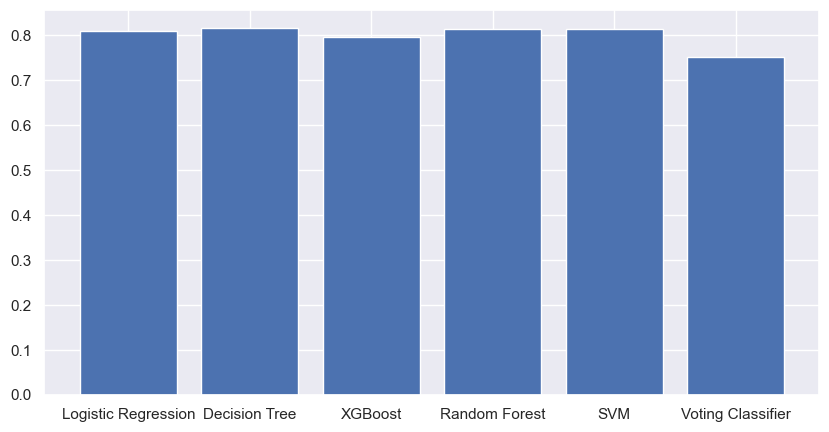

In [79]:
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(metric_df.index, metric_df['Accuracy Score'])
plt.show()

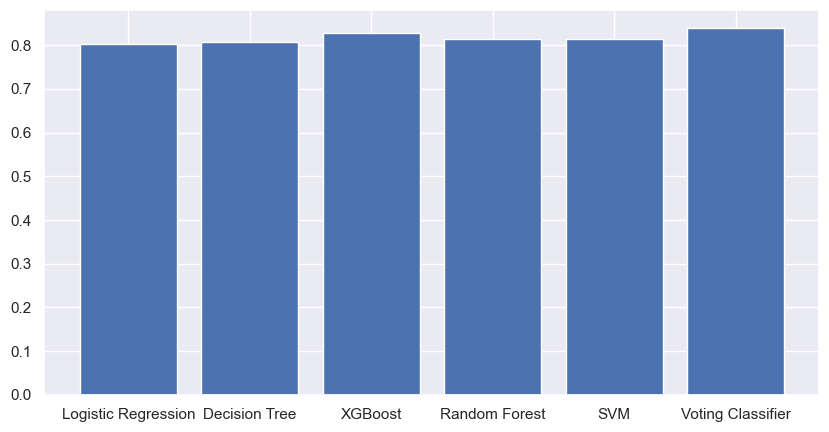

In [80]:
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(metric_df.index, metric_df['Precision Score'])
plt.show()

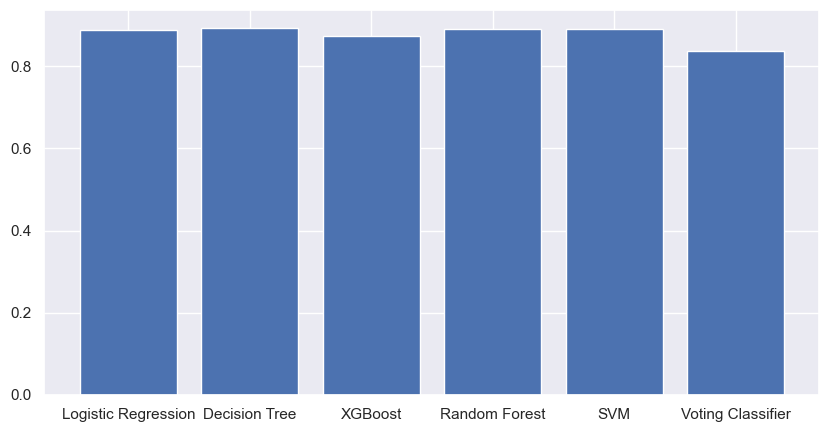

In [81]:
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(metric_df.index, metric_df['F1 Score'])
plt.show()

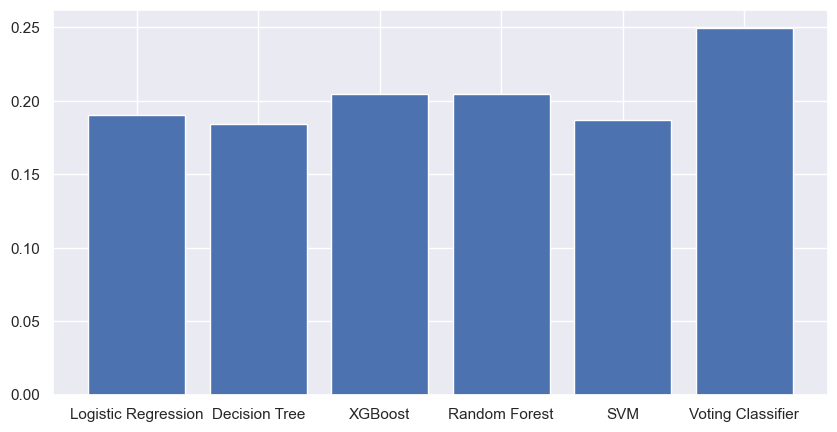

In [82]:
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(metric_df.index, metric_df['Mean Absolute Error'])
plt.show()

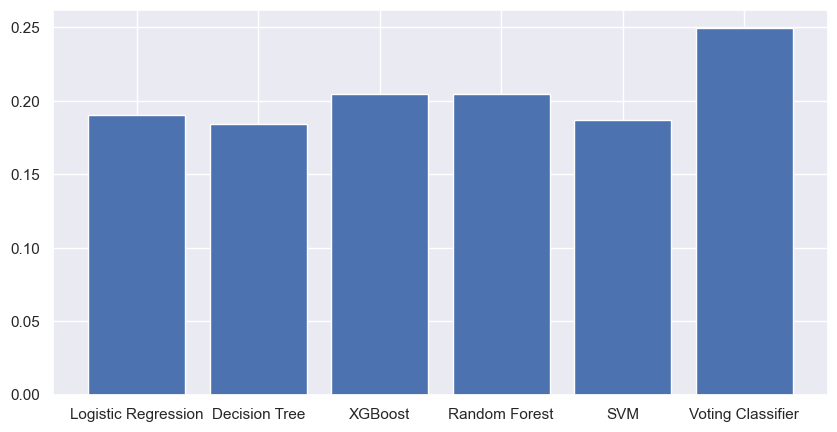

In [83]:
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(metric_df.index, metric_df['Mean Squared Error'])
plt.show()

In [ ]:
metric_df.dtypes

<h1> Deploy model

In [ ]:
import joblib

In [73]:
joblib.dump(decision, 'final model.joblib')

['final model.joblib']